In [1]:
import Cdf
import myplot
import matplotlib.pyplot as plt
%matplotlib inline

## Distributions

Replacement Plotter

In [2]:
def plot_cdf(cdf, xlog=False, ylog=False, complement=False):
    xs, ys = cdf.Render()
    ys = [1-y for y in ys] if complement else ys
    (fig, ax) = plt.subplots()
    if xlog and ylog:
        ax.loglog(xs, ys)
    elif xlog:
        ax.semilogx(xs, ys)
    elif ylog:
        ax.semilogy(xs, ys)
    else:
        ax.plot(xs, ys)
    return (fig, ax)

### Expovariate

In [3]:
import random

In [4]:
exp_cdf = Cdf.MakeCdfFromList([random.expovariate(1/32.6) for _ in range(44)])

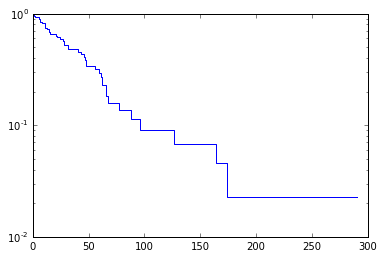

In [5]:
plot_cdf(exp_cdf, complement=True, ylog=True);

### Pareto

In [6]:
def paretovariate(alpha, xm):
    return xm * random.paretovariate(alpha)

In [7]:
pareto_cdf = Cdf.MakeCdfFromList([paretovariate(1.0, 0.5) for _ in range(1000)])

(0, 10)

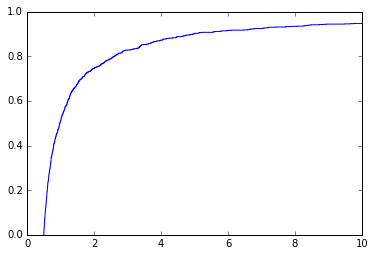

In [8]:
(f, ax) = plot_cdf(pareto_cdf)
ax.set_xlim((0, 10))

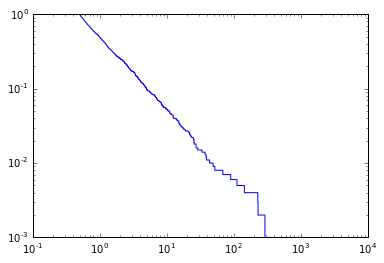

In [9]:
plot_cdf(pareto_cdf, complement=True, xlog=True, ylog=True);

#### Pareto World

In [10]:
## Taking a more reasonable mean height of 180 cm and 1e6 samples
pareto_sample = [paretovariate(18.0/8.0, 100.0) for _ in range(int(1e6))]

In [11]:
pareto_mean = sum(pareto_sample)/len(pareto_sample)
pareto_mean

180.217358727752

In [12]:
len([p for p in pareto_sample if p < pareto_mean])/float(len(pareto_sample))

0.734008

In [13]:
max(pareto_sample)

82841.76859892279

~73% of people in Pareto World are less than the mean of 180 cm

The tallest person in Pareto World is almost a km tall! 

## The Normal Distribution

In [14]:
import erf

### Normal IQs

In [15]:
iqs = [100, 115, 130, 145]
for iq in iqs:
    print "Fraction above %d is %0.2f" % (iq, 1 - erf.NormalCdf(iq, mu=100, sigma=15))

Fraction above 100 is 0.50
Fraction above 115 is 0.16
Fraction above 130 is 0.02
Fraction above 145 is 0.00


In a world of 6 Billion people, the number with an IQ above 190

In [16]:
(1 - erf.NormalCdf(190, mu=100, sigma=15)) * 1000000000

0.98658770042447941

Or just 1 person

### Live Births

In [17]:
import survey
table = survey.Pregnancies()
table.ReadRecords()

In [18]:
def is_live_birth(record):
    return record.outcome == 1

prglength_cdf = Cdf.MakeCdfFromList([r.prglength for r in table.records if is_live_birth(r)])

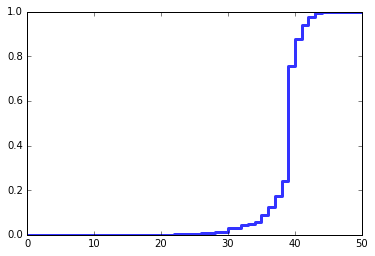

In [19]:
myplot.Cdf(prglength_cdf);

## Random Numbers

#### Plotting a Weibull CDF

In [20]:
import math
from random import random

def weibullvariate(lam, k):
    return -math.log(1-random())**(1.0/k)*lam

{'xscale': 'linear', 'yscale': 'linear'}

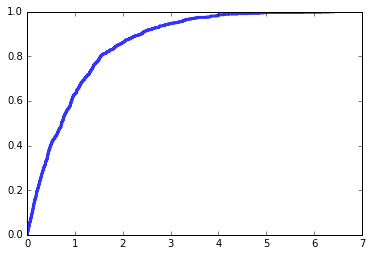

In [21]:
myplot.Cdf(Cdf.MakeCdfFromList([weibullvariate(1, 1) for _ in range(1000)]))